In [1]:
import pandas as pd
import numpy as np

## **NERACA**

In [2]:
neraca = pd.read_csv ("./Nelly Neraca.csv",delimiter=";")

In [3]:
neraca.head()

,KETEANGAN,2018,2019
0,ASET,NaN,NaN
1,ASET LANCAR,NaN,NaN
2,Kas dan Setara Kas,"44,392,323,611","51,881,866,648"
3,Piutang Usaha,"35,694,113,233","34,302,439,747"
4,Aset Keuangan Lancar Lainnya,"26,398,205,843","12,398,434,829"


## Langkah pertama kita bersihkan dlu datanya 

In [4]:
neraca=neraca.rename(columns={"KETEANGAN":"NERACA"})
neraca.head()

,NERACA,2018,2019
0,ASET,NaN,NaN
1,ASET LANCAR,NaN,NaN
2,Kas dan Setara Kas,"44,392,323,611","51,881,866,648"
3,Piutang Usaha,"35,694,113,233","34,302,439,747"
4,Aset Keuangan Lancar Lainnya,"26,398,205,843","12,398,434,829"


In [5]:
neraca.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   NERACA  30 non-null     object
 1   2018    23 non-null     object
 2   2019    23 non-null     object
dtypes: object(3)
memory usage: 848.0+ bytes


In [6]:
## hapus dulu koma di kolom tahun, agar tidak terjadi error saat analisis
neraca["2018"]=neraca["2018"].str.replace(",","")
neraca["2019"]=neraca["2019"].str.replace(",","")
neraca.head()

,NERACA,2018,2019
0,ASET,NaN,NaN
1,ASET LANCAR,NaN,NaN
2,Kas dan Setara Kas,44392323611,51881866648
3,Piutang Usaha,35694113233,34302439747
4,Aset Keuangan Lancar Lainnya,26398205843,12398434829


In [7]:
neraca.info()

## Selanjutnya kita ubah type datanya pada kolom 2018 2019 ke int 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   NERACA  30 non-null     object
 1   2018    23 non-null     object
 2   2019    23 non-null     object
dtypes: object(3)
memory usage: 848.0+ bytes


In [8]:
neraca=neraca.dropna()

## Disini aku hapus data yang kosong 

In [9]:
neraca[["2018","2019"]]=neraca[["2018","2019"]].apply(pd.to_numeric)

neraca.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23 entries, 2 to 29
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   NERACA  23 non-null     object
 1   2018    23 non-null     int64 
 2   2019    23 non-null     int64 
dtypes: int64(2), object(1)
memory usage: 736.0+ bytes


## **OK Clean !!**

# **Selanjutnya Laba-Rugi**

In [10]:
LabaRugi= pd.read_csv ("./Nelly Laba-Rugi.csv",delimiter=";")


In [11]:
LabaRugi

,LABA/RUGI,2018,2019
0,PENDAPATAN,"236,020,877,647","250,170,826,551"
1,BEBAN POKOK PENDAPATAN,"154,144,486,292","166,376,407,183"
2,LABA BRUTO,"81,876,391,355","83,794,419,368"
3,Beban Usaha,"25,919,236,625","26,245,408,318"
4,Penghasilan Lainnya - Neto,"7,182,946","367,373,902"
5,LABA USAHA,"55,964,337,676","57,916,384,952"
6,Penghasilan Bunga,"1,927,950,131","1,500,569,493"
7,Beban Bunga dan Keuangan,"651,560,869","2,976,547,227"
8,Beban Pajak Final,"2,300,526,923","2,300,526,923"
9,LABA SEBELUM PAJAK,"54,940,200,015","53,967,226,757"


In [12]:
LabaRugi["2018"]=LabaRugi["2018"].str.replace(",","")
LabaRugi["2019"]=LabaRugi["2019"].str.replace(",","")

In [13]:
LabaRugi.head()

,LABA/RUGI,2018,2019
0,PENDAPATAN,236020877647,250170826551
1,BEBAN POKOK PENDAPATAN,154144486292,166376407183
2,LABA BRUTO,81876391355,83794419368
3,Beban Usaha,25919236625,26245408318
4,Penghasilan Lainnya - Neto,7182946,367373902


In [14]:
LabaRugi.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12 entries, 0 to 11
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   LABA/RUGI  12 non-null     object
 1   2018       12 non-null     object
 2   2019       12 non-null     object
dtypes: object(3)
memory usage: 416.0+ bytes


In [15]:
LabaRugi[["2018","2019"]]=LabaRugi[["2018","2019"]].apply(pd.to_numeric)

# **OKE Sekarang kita mulai Financial Analysis dengan 12 type berbeda**

## **1 Analisis Vertical atau Common Size**

In [16]:
neraca.head()

,NERACA,2018,2019
2,Kas dan Setara Kas,44392323611,51881866648
3,Piutang Usaha,35694113233,34302439747
4,Aset Keuangan Lancar Lainnya,26398205843,12398434829
5,Persediaan,16990972339,16253368837
6,Pajak di Bayar Dimuka,748896274,703240450


## **Disini aku mau buat dua data buat neraca 1 yg berisi persentase dan 1 yg tidak agar bisa di visualisai**

In [17]:
neraca_visualisasi=neraca.copy()

In [18]:
neraca_percentase=neraca.copy()
neraca_percentase.head()

,NERACA,2018,2019
2,Kas dan Setara Kas,44392323611,51881866648
3,Piutang Usaha,35694113233,34302439747
4,Aset Keuangan Lancar Lainnya,26398205843,12398434829
5,Persediaan,16990972339,16253368837
6,Pajak di Bayar Dimuka,748896274,703240450


## Buat persentase langsung

In [19]:
neraca_percentase["PERSENTASE 2018"]=(neraca_percentase["2018"]/474345474753)
neraca_percentase["PERSENTASE 2019"]=(neraca_percentase["2019"]/527467886738)

neraca_percentase.head()

,NERACA,2018,2019,PERSENTASE 2018,PERSENTASE 2019
2,Kas dan Setara Kas,44392323611,51881866648,0.093586,0.098360
3,Piutang Usaha,35694113233,34302439747,0.075249,0.065032
4,Aset Keuangan Lancar Lainnya,26398205843,12398434829,0.055652,0.023506
5,Persediaan,16990972339,16253368837,0.035820,0.030814
6,Pajak di Bayar Dimuka,748896274,703240450,0.001579,0.001333


In [20]:
neraca_percentase["PERSENTASE 2018"]=pd.Series(["{0:.2f}%".format(val * 100) 
                                     for val in neraca_percentase["PERSENTASE 2018"]], 
                                     index = neraca_percentase.index)

neraca_percentase["PERSENTASE 2019"]=pd.Series(["{0:.2f}%".format(val * 100) 
                                     for val in neraca_percentase["PERSENTASE 2019"]], 
                                     index = neraca_percentase.index)

In [21]:
neraca_percentase

,NERACA,2018,2019,PERSENTASE 2018,PERSENTASE 2019
2,Kas dan Setara Kas,44392323611,51881866648,9.36%,9.84%
3,Piutang Usaha,35694113233,34302439747,7.52%,6.50%
4,Aset Keuangan Lancar Lainnya,26398205843,12398434829,5.57%,2.35%
5,Persediaan,16990972339,16253368837,3.58%,3.08%
6,Pajak di Bayar Dimuka,748896274,703240450,0.16%,0.13%
7,Pembayaran Di Muka,17819032522,18473590966,3.76%,3.50%
8,JUMLAH ASET LANCAR,142043543822,134012941477,29.95%,25.41%
10,Aset Tetap,331525743565,392627670150,69.89%,74.44%
11,Aset Pajak Tangguhan,776187366,827275111,0.16%,0.16%
12,JUMLAH ASET TIDAK LANCAR,332301930931,393454945261,70.05%,74.59%


## **Good sekarang kita bisa lihat persentase dari aset PT.NELLY**
## **Cara bacanya "Oh ternyata Aset lancar tahun 2018 PT.NELLY adalah 29% dari total aset yang dimiliki begitu juga yang lainnya**


## Yang buat visualisasi

In [22]:
neraca_visualisasi["PERSENTASE 2018"]=(neraca_visualisasi["2018"]/474345474753)*100
neraca_visualisasi["PERSENTASE 2019"]=(neraca_visualisasi["2019"]/474345474753)*100

## Yang buat visualisasi

In [23]:
neraca_visualisasi.head()

,NERACA,2018,2019,PERSENTASE 2018,PERSENTASE 2019
2,Kas dan Setara Kas,44392323611,51881866648,9.358648,10.937570
3,Piutang Usaha,35694113233,34302439747,7.524919,7.231531
4,Aset Keuangan Lancar Lainnya,26398205843,12398434829,5.565186,2.613798
5,Persediaan,16990972339,16253368837,3.581983,3.426483
6,Pajak di Bayar Dimuka,748896274,703240450,0.157880,0.148255


In [24]:
from matplotlib import pyplot as plt

<AxesSubplot:xlabel='NERACA'>

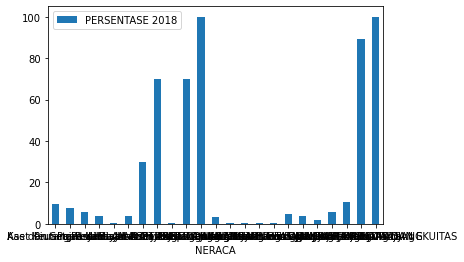

In [25]:
neraca_visualisasi.plot.bar(x='NERACA', y='PERSENTASE 2018', rot=0)

<AxesSubplot:xlabel='NERACA'>

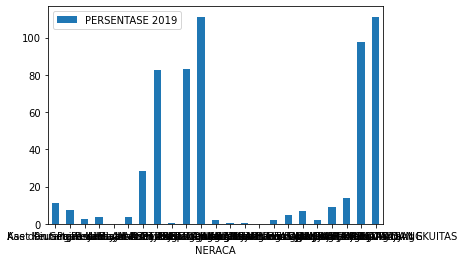

In [26]:
neraca_visualisasi.plot.bar(x='NERACA', y='PERSENTASE 2019', rot=0)

## **OK kita sudah dapat hasil dari analysis vertical buat NERACA**

## Selanjutnya LABA/RUGI

In [27]:
LabaRugi.head()

,LABA/RUGI,2018,2019
0,PENDAPATAN,236020877647,250170826551
1,BEBAN POKOK PENDAPATAN,154144486292,166376407183
2,LABA BRUTO,81876391355,83794419368
3,Beban Usaha,25919236625,26245408318
4,Penghasilan Lainnya - Neto,7182946,367373902


In [28]:
## disini aku juga buat dua jenis data
labarugi_persentase=LabaRugi.copy()
LabaRugi_visualisasi=LabaRugi.copy()

## **Buat yang persentase langsung**

In [29]:
labarugi_persentase

,LABA/RUGI,2018,2019
0,PENDAPATAN,236020877647,250170826551
1,BEBAN POKOK PENDAPATAN,154144486292,166376407183
2,LABA BRUTO,81876391355,83794419368
3,Beban Usaha,25919236625,26245408318
4,Penghasilan Lainnya - Neto,7182946,367373902
5,LABA USAHA,55964337676,57916384952
6,Penghasilan Bunga,1927950131,1500569493
7,Beban Bunga dan Keuangan,651560869,2976547227
8,Beban Pajak Final,2300526923,2300526923
9,LABA SEBELUM PAJAK,54940200015,53967226757


In [30]:
labarugi_persentase["PERSENTASE 2018"]=(labarugi_persentase["2018"]/236020877647)
labarugi_persentase["PERSENTASE 2019"]=(labarugi_persentase["2019"]/250170826551)

In [31]:
labarugi_persentase["PERSENTASE 2018"]=pd.Series(["{0:.2f}%".format(val * 100) 
                                     for val in labarugi_persentase["PERSENTASE 2018"]], 
                                     index = labarugi_persentase.index)

labarugi_persentase["PERSENTASE 2019"]=pd.Series(["{0:.2f}%".format(val * 100) 
                                     for val in labarugi_persentase["PERSENTASE 2019"]], 
                                     index = labarugi_persentase.index)

In [36]:
labarugi_persentase

,LABA/RUGI,2018,2019,PERSENTASE 2018,PERSENTASE 2019
0,PENDAPATAN,236020877647,250170826551,100.00%,100.00%
1,BEBAN POKOK PENDAPATAN,154144486292,166376407183,65.31%,66.51%
2,LABA BRUTO,81876391355,83794419368,34.69%,33.49%
3,Beban Usaha,25919236625,26245408318,10.98%,10.49%
4,Penghasilan Lainnya - Neto,7182946,367373902,0.00%,0.15%
5,LABA USAHA,55964337676,57916384952,23.71%,23.15%
6,Penghasilan Bunga,1927950131,1500569493,0.82%,0.60%
7,Beban Bunga dan Keuangan,651560869,2976547227,0.28%,1.19%
8,Beban Pajak Final,2300526923,2300526923,0.97%,0.92%
9,LABA SEBELUM PAJAK,54940200015,53967226757,23.28%,21.57%


## Cara Bacanya sama kayak neraca

In [33]:
LabaRugi_visualisasi["PERSENTASE 2018"]=(LabaRugi_visualisasi["2018"]/236020877647)*100
LabaRugi_visualisasi["PERSENTASE 2019"]=(LabaRugi_visualisasi["2019"]/250170826551)*100

<AxesSubplot:xlabel='LABA/RUGI'>

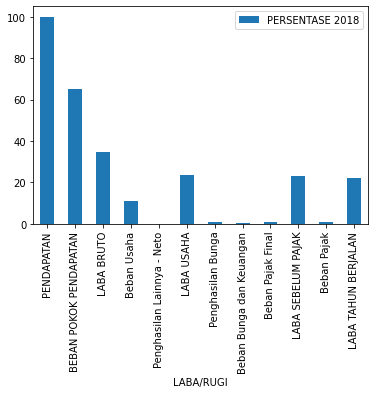

In [34]:
LabaRugi_visualisasi.plot.bar(x="LABA/RUGI",y="PERSENTASE 2018")

<AxesSubplot:xlabel='LABA/RUGI'>

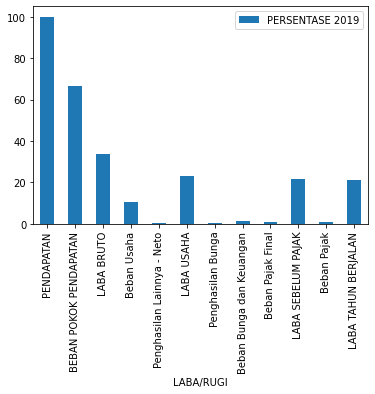

In [35]:
LabaRugi_visualisasi.plot.bar(x="LABA/RUGI",y="PERSENTASE 2019")

# **Saran untuk visual lebih bagus dan jelas pakai Tableau atau desain sendiri di CorelDraw**

## **2. Analisis Trend/Horizontal**
## Analisis horizontal adalah suatu analisis persentase kenaikan ataupun penurunan yang terdapat di dalam berbagai pos akun laporan keuangan yang komparatif. Berdasarkan analisis horizontal, kita bisa mengetahui jumlah pada setiap pos laporan tahun terakhir bila dibandingkan dengan pos yang ada di dalam laporan keuangan sebelumnya

In [38]:
tren_analysis_neraca=neraca.copy()
tren_analysis_labarugi=LabaRugi.copy()

In [44]:
tren_analysis_neraca_type1=tren_analysis_neraca[["NERACA","2019","2018"]]

tren_analysis_neraca_type1["PERSENTASE KENAIKAN/PENURUNAN"]=(tren_analysis_neraca_type1["2019"]-tren_analysis_neraca_type1["2018"])/tren_analysis_neraca_type1["2018"]
tren_analysis_neraca_type1["PERSENTASE KENAIKAN/PENURUNAN"]=pd.Series(["{0:.2f}%".format(val * 100) 
                                                            for val in tren_analysis_neraca_type1["PERSENTASE KENAIKAN/PENURUNAN"]], 
                                                            index = tren_analysis_neraca_type1.index)

C:\Users\ganoa\AppData\Local\Temp\ipykernel_11028\2344311317.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tren_analysis_neraca_type1["PERSENTASE KENAIKAN/PENURUNAN"]=(tren_analysis_neraca_type1["2019"]-tren_analysis_neraca_type1["2018"])/tren_analysis_neraca_type1["2018"]
C:\Users\ganoa\AppData\Local\Temp\ipykernel_11028\2344311317.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tren_analysis_neraca_type1["PERSENTASE KENAIKAN/PENURUNAN"]=pd.Series(["{0:.2f}%".format(val * 100)


In [47]:
tren_analysis_neraca_type1

,NERACA,2019,2018,PERSENTASE KENAIKAN/PENURUNAN
2,Kas dan Setara Kas,51881866648,44392323611,16.87%
3,Piutang Usaha,34302439747,35694113233,-3.90%
4,Aset Keuangan Lancar Lainnya,12398434829,26398205843,-53.03%
5,Persediaan,16253368837,16990972339,-4.34%
6,Pajak di Bayar Dimuka,703240450,748896274,-6.10%
7,Pembayaran Di Muka,18473590966,17819032522,3.67%
8,JUMLAH ASET LANCAR,134012941477,142043543822,-5.65%
10,Aset Tetap,392627670150,331525743565,18.43%
11,Aset Pajak Tangguhan,827275111,776187366,6.58%
12,JUMLAH ASET TIDAK LANCAR,393454945261,332301930931,18.40%


## **Cara Bacanya misal jika positif berarti ada kenaikan di neraca kita dapat lihat ada kenaikan utang bank jangka panjang 83%**
## **Begitu juga kalau minus berarti ada penurunan misal pada Aset Keuangan Lancar Lainnya -53%**

In [62]:
tren_analysis_neraca_visual=tren_analysis_neraca_type1[["NERACA","2018","2019"]]
tren_analysis_neraca_visual

,NERACA,2018,2019
2,Kas dan Setara Kas,44392323611,51881866648
3,Piutang Usaha,35694113233,34302439747
4,Aset Keuangan Lancar Lainnya,26398205843,12398434829
5,Persediaan,16990972339,16253368837
6,Pajak di Bayar Dimuka,748896274,703240450
7,Pembayaran Di Muka,17819032522,18473590966
8,JUMLAH ASET LANCAR,142043543822,134012941477
10,Aset Tetap,331525743565,392627670150
11,Aset Pajak Tangguhan,776187366,827275111
12,JUMLAH ASET TIDAK LANCAR,332301930931,393454945261


## **Disini aku mau buatkan visualnya tapi terlalu panjang jadi aku sederhanakan**

In [68]:
tren_neraca_vis_sederhana=tren_analysis_neraca_visual.iloc[[6,9,10,16,19,20,21,22]]

In [69]:
x=tren_neraca_vis_sederhana["2018"]
y=tren_neraca_vis_sederhana["2019"]
a=tren_neraca_vis_sederhana["NERACA"]

<Figure size 8000x80000 with 0 Axes>

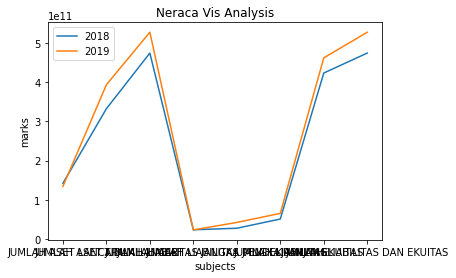

<Figure size 8000x80000 with 0 Axes>

In [75]:
# Plotting the Data
from matplotlib.pyplot import figure

plt.plot(a, x, label='2018')
plt.plot(a, y, label='2019')
  
plt.xlabel('subjects')
plt.ylabel('marks')
plt.title("Neraca Vis Analysis")

  
plt.legend()

figure(figsize=(100, 1000), dpi=80)

## **Masih tidak jelas jadi nanti akan lebih rekomendasi pakai Tableau setidaknya kita bisa liat tahun 2019 banyak kenaikan**

## **LabaRugi**

In [77]:
LabaRugi

,LABA/RUGI,2018,2019
0,PENDAPATAN,236020877647,250170826551
1,BEBAN POKOK PENDAPATAN,154144486292,166376407183
2,LABA BRUTO,81876391355,83794419368
3,Beban Usaha,25919236625,26245408318
4,Penghasilan Lainnya - Neto,7182946,367373902
5,LABA USAHA,55964337676,57916384952
6,Penghasilan Bunga,1927950131,1500569493
7,Beban Bunga dan Keuangan,651560869,2976547227
8,Beban Pajak Final,2300526923,2300526923
9,LABA SEBELUM PAJAK,54940200015,53967226757


In [78]:
tren_analysis_labarugi_type1=tren_analysis_labarugi[["LABA/RUGI","2019","2018"]]

tren_analysis_labarugi_type1["PERSENTASE KENAIKAN/PENURUNAN"]=(tren_analysis_labarugi_type1["2019"]-tren_analysis_labarugi_type1["2018"])/tren_analysis_labarugi_type1["2018"]
tren_analysis_labarugi_type1["PERSENTASE KENAIKAN/PENURUNAN"]=pd.Series(["{0:.2f}%".format(val * 100) 
                                                            for val in tren_analysis_labarugi_type1["PERSENTASE KENAIKAN/PENURUNAN"]], 
                                                            index = tren_analysis_labarugi_type1.index)

C:\Users\ganoa\AppData\Local\Temp\ipykernel_11028\1011895807.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tren_analysis_labarugi_type1["PERSENTASE KENAIKAN/PENURUNAN"]=(tren_analysis_labarugi_type1["2019"]-tren_analysis_labarugi_type1["2018"])/tren_analysis_labarugi_type1["2018"]
C:\Users\ganoa\AppData\Local\Temp\ipykernel_11028\1011895807.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tren_analysis_labarugi_type1["PERSENTASE KENAIKAN/PENURUNAN"]=pd.Series(["{0:.2f}%".format(val * 100)


In [79]:
tren_analysis_labarugi_type1

,LABA/RUGI,2019,2018,PERSENTASE KENAIKAN/PENURUNAN
0,PENDAPATAN,250170826551,236020877647,6.00%
1,BEBAN POKOK PENDAPATAN,166376407183,154144486292,7.94%
2,LABA BRUTO,83794419368,81876391355,2.34%
3,Beban Usaha,26245408318,25919236625,1.26%
4,Penghasilan Lainnya - Neto,367373902,7182946,5014.53%
5,LABA USAHA,57916384952,55964337676,3.49%
6,Penghasilan Bunga,1500569493,1927950131,-22.17%
7,Beban Bunga dan Keuangan,2976547227,651560869,356.83%
8,Beban Pajak Final,2300526923,2300526923,0.00%
9,LABA SEBELUM PAJAK,53967226757,54940200015,-1.77%


## ***Oke mungkin segitu untuk analysis vertikal & horizontal pada PT. NELLY**
## **Untuk Visualnya lebih rekomendasi pakai powerBI/Tableau**